# Credit Cards Churned
In this project, we will analyze this dataset which contains information about credit cards customers and their information related to the total number of transactions made, their credit limit and so on.

This focus in finding a business solution related to the causes of customers leaving their credit cards services and improving and make the customers change their opinion about the bank.

In [24]:
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\CR\Desktop\datasets_used\data_visualizations\BankChurners.csv")

In [4]:
df = df.dropna()

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [32]:
educational_level_customers = df.groupby("Education_Level").sum()
print(educational_level_customers)

                     CLIENTNUM  \
Education_Level                  
College           750808020279   
Doctorate         332567750283   
Graduate         2311387331949   
High School      1487702837604   
Post-Graduate     381279298578   
Uneducated       1097734007196   
Unknown          1124172373452   

                                                    Attrition_Flag  \
Education_Level                                                      
College          Existing CustomerExisting CustomerExisting Cus...   
Doctorate        Existing CustomerAttrited CustomerExisting Cus...   
Graduate         Existing CustomerExisting CustomerExisting Cus...   
High School      Existing CustomerExisting CustomerExisting Cus...   
Post-Graduate    Existing CustomerExisting CustomerExisting Cus...   
Uneducated       Existing CustomerExisting CustomerExisting Cus...   
Unknown          Existing CustomerExisting CustomerExisting Cus...   

                 Customer_Age  \
Education_Level              

In [21]:
df = df.replace({"M":"Male","F":"Female"})

We create a barplot to see the total number of mens and women for each educational level

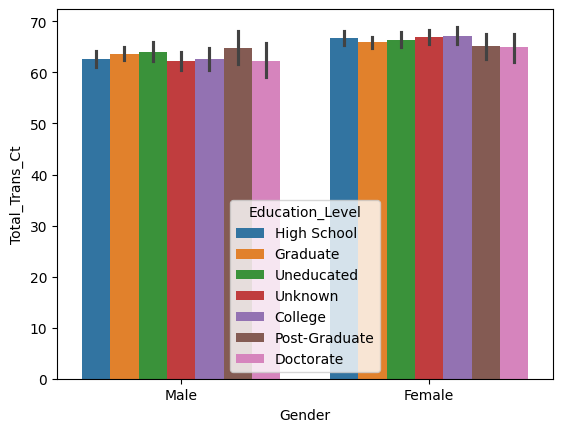

In [31]:
gender_transactions = sb.barplot(data=df,x="Gender",y="Total_Trans_Ct",hue="Education_Level")

We want to know how many customers are active

In [52]:
customers_flag = df.groupby("Attrition_Flag")["Attrition_Flag"].agg("count")
print(customers_flag)

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
Name: Attrition_Flag, dtype: int64


We find there are more existing customers than attritied customers.

We can see if there is a correlation between marital status and their flag.

There is no an exact correlation

<Axes: xlabel='Attrition_Flag'>

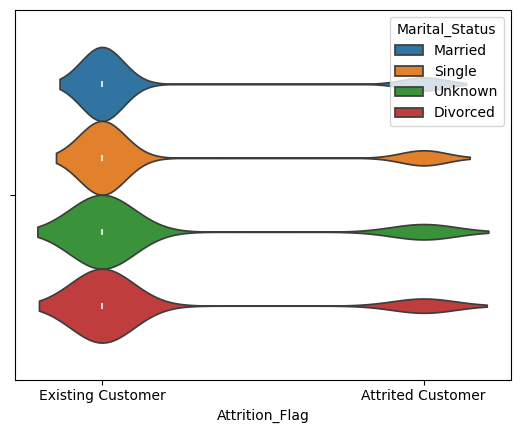

In [47]:
sb.violinplot(data=df,x="Attrition_Flag",hue="Marital_Status")


We can see if there is a possible correlation between age of customers and their decision

In [70]:
no_existing_customers = df["Attrition_Flag"] == "Attrited Customer"
print(no_existing_customers)


0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123     True
10124     True
10125     True
10126     True
Name: Attrition_Flag, Length: 10127, dtype: bool


<Axes: xlabel='Customer_Age', ylabel='Attrition_Flag'>

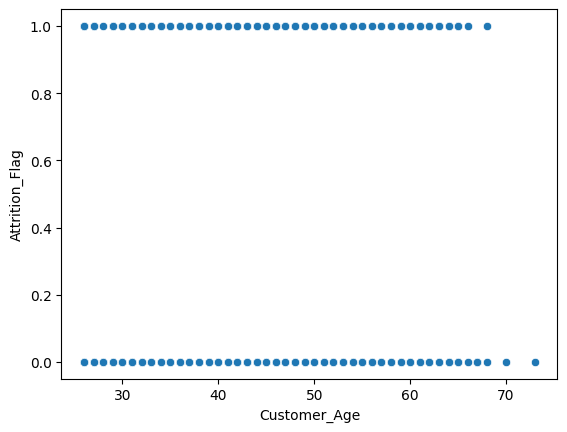

In [74]:
sb.scatterplot(data=df,x="Customer_Age",y=no_existing_customers)

We find either customers from 20 to 50 years old tend to keep with the service as leaving the service.